 ## Project 3: `Diabetes Prediction `

Diabetes is a major global health concern that affects millions of people every year. Early
detection can help individuals take preventive steps and manage their health better. In this
project, we use real-world health data from patients to build a machine learning model that
can predict whether a person is likely to have diabetes or not. Students will explore the
data, clean and prepare it, apply SMOTE to handle imbalance, and build a K-Nearest
Neighbors (KNN) classifier to make predictions. The goal is to not only improve technical
skills but also understand how data science can support important health decisions.

- **Purpose**: This cell imports the necessary libraries to support the entire workflow of the diabetes prediction project, including data handling, visualization, preprocessing, model training, evaluation, and addressing class imbalance.
- **Key Terms**:
  - **NumPy (`np`)**: A library for numerical computations, providing support for arrays and mathematical operations, used for efficient data manipulation.
  - **Pandas (`pd`)**: A library for data manipulation and analysis, offering data structures like DataFrames to handle tabular data, such as the `diabetes-data.csv` dataset.
  - **Matplotlib (`plt`)**: A plotting library for creating static, interactive, and animated visualizations, used here for exploratory data analysis (e.g., histograms).
  - **Seaborn (`sns`)**: A statistical data visualization library built on Matplotlib, providing high-level interfaces for creating informative plots like heatmaps and count plots.
  - **StandardScaler**: A preprocessing tool from scikit-learn that standardizes features by removing the mean and scaling to unit variance, ensuring features contribute equally to machine learning models.
  - **train_test_split**: A scikit-learn function to split the dataset into training and testing sets, enabling model training and evaluation on separate data.
  - **KNeighborsClassifier**: A scikit-learn implementation of the K-Nearest Neighbors (KNN) algorithm, a machine learning model that classifies data points based on the majority class of their nearest neighbors.
  - **sklearn.metrics**: A scikit-learn module providing evaluation metrics (e.g., `accuracy_score`, `classification_report`) to assess model performance.
  - **SMOTE (Synthetic Minority Over-sampling Technique)**: A technique from the `imblearn` library to address class imbalance by generating synthetic samples for the minority class (e.g., diabetic cases), improving model performance on underrepresented classes.
- **Significance**: Importing these libraries at the start ensures all necessary tools are available for the project. NumPy and Pandas facilitate data loading and manipulation, Matplotlib and Seaborn enable exploratory data analysis, StandardScaler and SMOTE handle preprocessing, and KNeighborsClassifier supports model training. The `sklearn.metrics` module allows for robust model evaluation, critical for assessing the diabetes prediction model’s effectiveness.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset , here we will load our dataset from official link of Samatrix

In [ ]:
df = pd.read_csv("diabetes-data.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

This section provides a summary of the dataset's structure and data types, generated as output from the `df.info()` or similar Pandas method, to understand its composition and ensure data integrity.

- RangeIndex: An index range from 0 to 767, indicating 768 rows (entries) in the dataset, representing individual patient records.
- Data Columns: Nine columns, each representing a feature (e.g., Pregnancies, Glucose) or the target variable (Outcome), with descriptions provided in the dataset overview.
- Non-Null Count: The number of non-missing values (768 for all columns), suggesting no missing data at this stage, which is essential for model training.
- Dtype: Data types of columns, including int64 (integer, e.g., Pregnancies, Age) and float64 (floating-point, e.g., BMI, DiabetesPedigreeFunction), indicating the numerical nature of the data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- Count: The number of non-null entries (768 for all features), confirming no missing values.
- Mean: The average value of each feature (e.g., 3.845052 for Pregnancies, 120.894531 for Glucose), indicating the central tendency.
- Standard Deviation (std): A measure of data spread (e.g., 3.369578 for Pregnancies, 31.972618 for Glucose), showing variability in the feature values.
- Min: The minimum value (e.g., 0 for Pregnancies, Glucose), highlighting potential zero-value issues.
- 25% (Q1): The first quartile, representing the 25th percentile of the data (e.g., 1.00000 for Pregnancies).
- 50% (Median): The median or 50th percentile (e.g., 3.0000 for Pregnancies), a robust measure of central tendency.
- 75% (Q3): The third quartile, representing the 75th percentile (e.g., 6.00000 for Pregnancies).
- Max: The maximum value (e.g., 17.00 for Pregnancies, 199.00 for Glucose), indicating the upper bound of the data.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


we will check for NULL values in our project , for that i will use `df.isna().sum()`

In [8]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


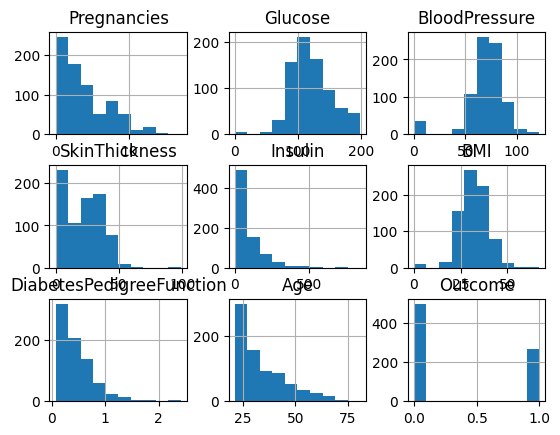

In [10]:
df.hist()
plt.show()



Key Insights from Each Histogram:

| Feature                      | Observation                                                                        | Significance                                                                 |
| ---------------------------- | ---------------------------------------------------------------------------------- | ---------------------------------------------------------------------------- |
| **Pregnancies**              | Most women had 0–2 pregnancies.                                                    | Low pregnancy count is more common. May not directly impact diabetes alone.  |
| **Glucose**                  | Some values are low (even 0), but most are around 100–125.                         | Glucose is critical for diabetes detection. **Zero values are unrealistic**. |
| **BloodPressure**            | Most people fall around 60–80. Some entries are **0**, which is medically invalid. | Needs cleaning. Zero BP is impossible.                                       |
| **SkinThickness**            | Some 0 values again; most are 20–40.                                               | Must replace zeros. Used to estimate body fat.                               |
| **Insulin**                  | Huge skew. Many 0 values and some high values (up to 800).                         | Insulin data is missing (zeros) and highly skewed. Must be cleaned.          |
| **BMI**                      | Generally between 25–35 for most. A few zeros (invalid).                           | BMI is important for diabetes risk. Zeros are invalid.                       |
| **DiabetesPedigreeFunction** | Most values are between 0.0–1.0. Long right tail (some high outliers).             | Pedigree function is skewed. Might influence prediction slightly.            |
| **Age**                      | Most patients are between 20–40. Few are 60+.                                      | Age is skewed left. Older people have more risk.                             |
| **Outcome**                  | More 0s than 1s — means most patients do **not** have diabetes.                    | This is an **imbalanced dataset**. Will need **SMOTE** to balance later.     |

---



here we can see that columns like Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI contains value 0 so this cant be real value so we need to replace this to mean

Significance: Zero values in features like Glucose, BloodPressure, SkinThickness, Insulin, and BMI (as seen in the summary statistics) may indicate missing or erroneous data, which can bias machine learning models. Replacing them with the mean is a simple imputation strategy, ensuring data usability while preserving the natural zero values in Pregnancies (e.g., non-pregnant individuals) and Outcome

In [11]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Outcome']

for col in cols:
    median_value = df[col].median()
    df[col] = df[col].replace(0, median_value)

This section iterates over the dataset columns to replace zero values with the mean (average) value for specific features, addressing potential data quality issues while preserving the integrity of certain columns.

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,4.278646,3.021516,1.000,2.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### AFTER FILLING THOSE ZEROS

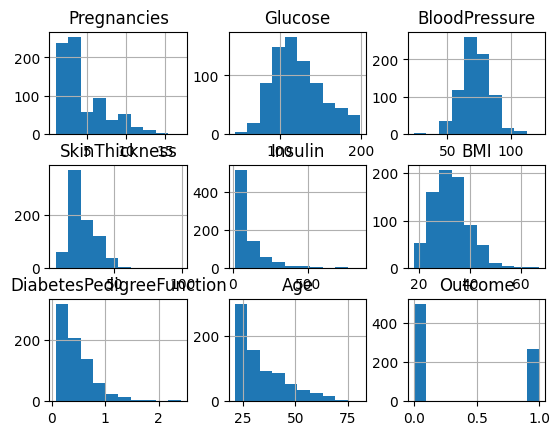

In [13]:
hist = df.hist()

This histogram shows the distribution of each feature in the diabetes dataset after replacing invalid zero values with column means. Now, features like Glucose, BloodPressure, BMI, SkinThickness, and Insulin no longer have unnatural spikes at zero, indicating that the data has been cleaned properly. Most values are now centered around realistic ranges — for example, Glucose clusters near 100, BloodPressure near 70–80, and BMI between 25–40. The Insulin and SkinThickness distributions still show right skew, which is typical in medical data. The Outcome column confirms class imbalance, with more non-diabetic (0) cases than diabetic (1). Overall, this cleaned dataset is now more suitable for training an accurate machine learning model.



In [14]:
x = df.drop(columns='Outcome',axis = 1)
y = df['Outcome']

In [15]:
cols = 3
rows = (len(x.columns) + cols - 1) // cols
i = 0

### KDE Plots: Distribution Comparison for Diabetic vs Non-Diabetic Patients

The following visualizations compare the **distribution of each health feature** between diabetic and non-diabetic patients using **Kernel Density Estimation (KDE)** plots.

- **Blue Curve** represents patients without diabetes (`Outcome = 0`)
- **Orange Curve** represents patients with diabetes (`Outcome = 1`)

#### Insights from the Plots:

- **Glucose:** Diabetic patients tend to have significantly higher glucose levels than non-diabetic ones. The two curves are well separated, making glucose a strong predictor.
- **BMI & Age:** Both features show clear separation between the classes — higher BMI and older age are more associated with diabetes.
- **BloodPressure & SkinThickness:** The difference is less distinct but still suggests slightly higher values for diabetic patients.
- **Insulin:** Highly skewed for both groups, but diabetic patients generally show a wider distribution and higher values.
- **Pregnancies:** Diabetic patients tend to have more pregnancies on average, but there is considerable overlap.
- **DiabetesPedigreeFunction:** The distributions are right-skewed, with diabetic patients showing slightly higher values on average.

These KDE plots help identify which features are most effective in distinguishing between diabetic and non-diabetic individuals, which is valuable for feature selection in model training.


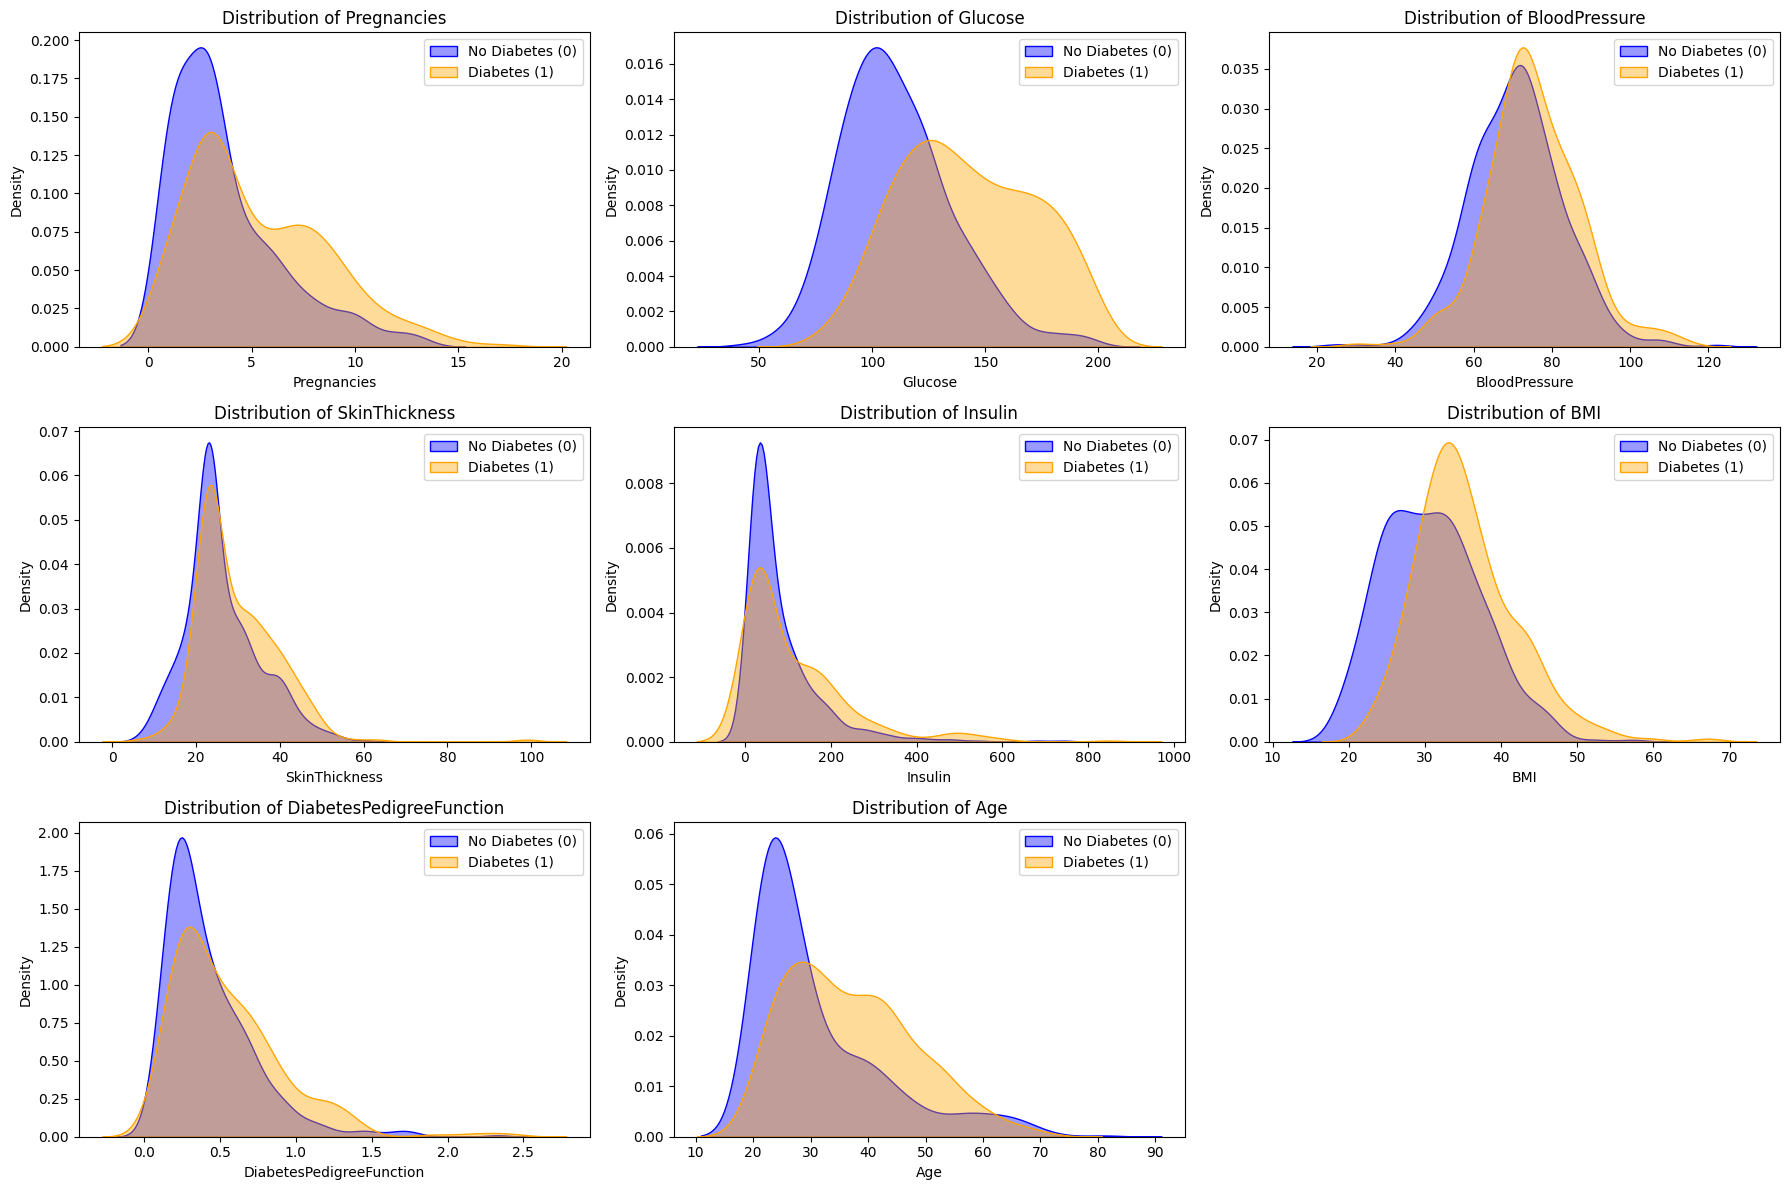

In [16]:
plt.figure(figsize=(18, rows * 4))
for j in x.columns:
    i += 1
    plt.subplot(rows, cols, i)
    sns.kdeplot(data=df[df['Outcome'] == 0], x=j, label='No Diabetes (0)', color='blue', fill=True, alpha=0.4)
    sns.kdeplot(data=df[df['Outcome'] == 1], x=j, label='Diabetes (1)', color='orange', fill=True, alpha=0.4)
    plt.title(f'Distribution of {j}')
    plt.xlabel(j)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

In [17]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [18]:
df['Outcome'].value_counts()[1] / df['Outcome'].value_counts()[0]

np.float64(0.536)

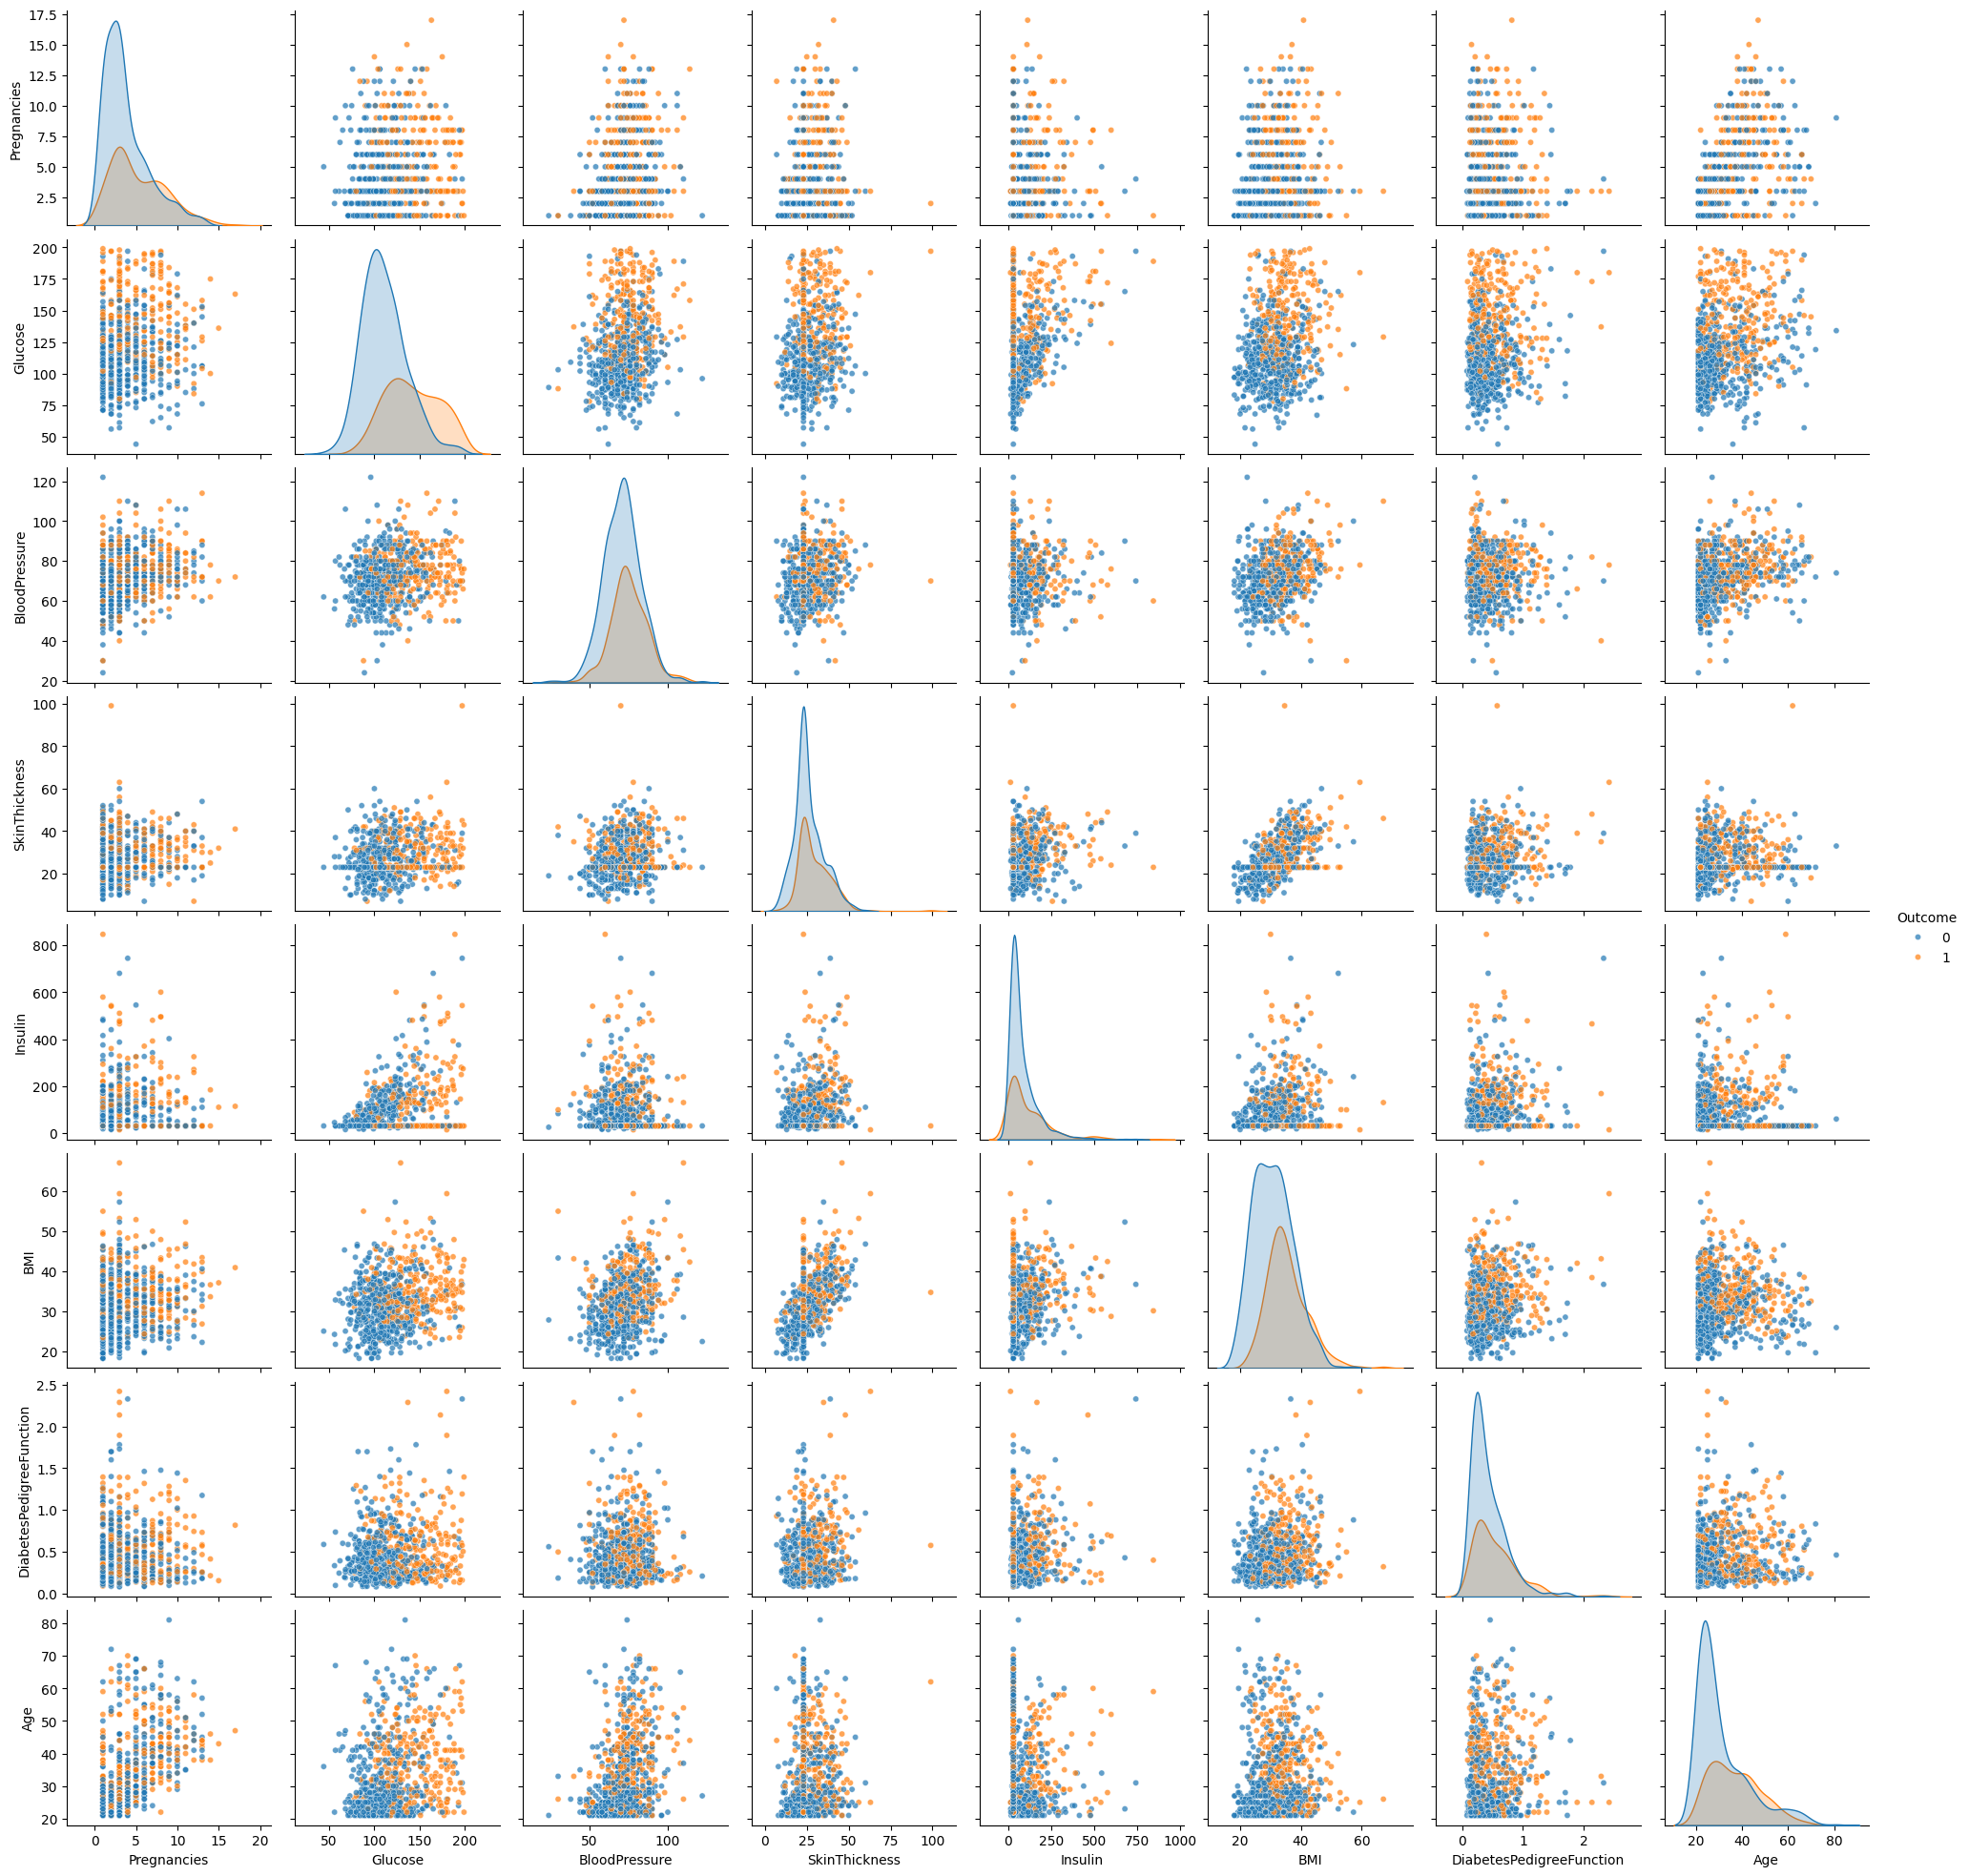

In [19]:
sns.pairplot(df, hue='Outcome', plot_kws={'alpha': 0.7, 's': 20})
plt.show()


---

###  **Pairplot Interpretation (by Outcome)**

This seaborn pairplot shows **relationships between features**, separated by diabetes `Outcome`:

* **Blue = Non-diabetic (0)**
* **Orange = Diabetic (1)**

---

###  **Key Observations:**

* **Glucose:** Diabetic individuals tend to have significantly higher glucose levels (clear separation in distribution).
* **BMI:** Diabetics generally have higher BMI values.
* **Age:** Higher age is more common among diabetic patients.
* **Insulin & SkinThickness:** Slight positive correlation, though distributions are overlapping.
* **Glucose vs. Insulin / BMI:** Positive correlations more apparent in diabetic class.
* **BloodPressure, Pregnancies:** Some separation but less distinct.

---

### **Conclusion:**

* **Glucose, BMI, and Age** show the most distinguishable patterns between diabetic and non-diabetic groups.
* **Feature combinations (e.g., Glucose vs. BMI)** help in separating classes better than individual features alone.
* The visualization supports the **feature importance** rankings from the Random Forest model.

Let me know if you'd like to zoom in on specific feature combinations or visualize only high-correlation pairs!


In [20]:
cor = df.corr()

In [21]:
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.149326,0.247530,0.060706,-0.059580,0.080540,-0.016151,0.538169,0.245466
Glucose,0.149326,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.247530,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.060706,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.059580,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.080540,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.016151,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.538169,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.245466,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


### Key Insights

#### 1. Correlation with Outcome (Target Variable)
The correlation values with Outcome show how strongly each feature is associated with diabetes presence:

- Glucose (0.4929) — Strongest positive correlation with diabetes outcome.

- BMI (0.3123) — Moderate positive correlation.

- Age (0.2384) — Moderate positive correlation.

- Pregnancies (0.2219) — Weak to moderate correlation.

- BloodPressure (0.1629) — Weak correlation.

- SkinThickness (0.1750), Insulin (0.1791), and DiabetesPedigreeFunction (0.1738) — All have weak positive correlations.


#### 2. Inter-feature Correlations
- Some variables are moderately correlated with each other:

- Insulin and Glucose (0.3966)

- SkinThickness and BMI (0.5357)

- Age and Pregnancies (0.5443)

- BloodPressure and BMI (0.2812)

These suggest possible multicollinearity, which may need to be handled in some models (like linear regression).



<Axes: >

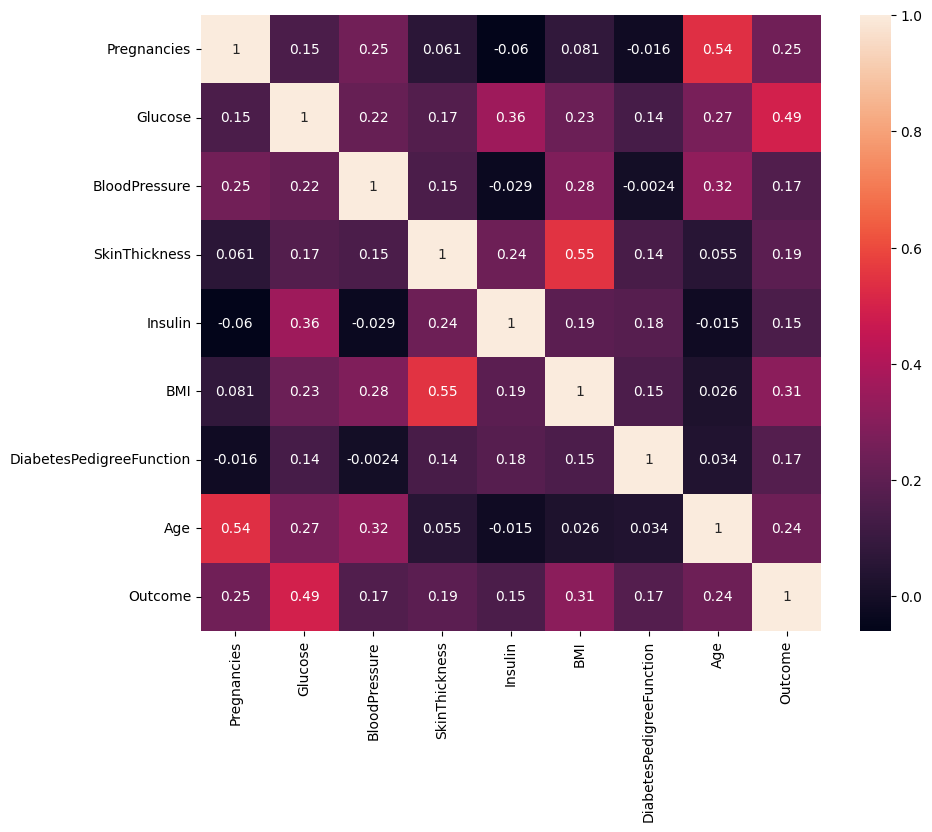

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True)

### Correlation Heatmap: Feature Relationships with Outcome

This heatmap shows the **Pearson correlation coefficients** between all numerical features in the diabetes dataset, including the target variable `Outcome`.

#### Key Insights:

- **Glucose** has the **strongest positive correlation** with `Outcome` (**0.49**), making it the most important predictor of diabetes in this dataset.
- **BMI** (0.31), **Age** (0.24), and **Pregnancies** (0.22) also show moderate positive correlations with diabetes.
- Features like **BloodPressure**, **SkinThickness**, **Insulin**, and **DiabetesPedigreeFunction** have weaker correlations (below 0.2) with `Outcome`, but may still contribute when combined.
- Some features are strongly correlated with each other:
  - **BMI and SkinThickness** (0.54) — logical, as both relate to body composition.
  - **Pregnancies and Age** (0.54) — expected, since older women tend to have had more pregnancies.
- **No strong negative correlations** are observed, which means most features either increase or stay neutral with increasing diabetes risk.




In [23]:
from sklearn.model_selection import train_test_split

This function is from sklearn.model_selection and is used to split your dataset into training and testing sets.

In [24]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42,stratify=y)

In [25]:
X_train.shape

(537, 8)

`StandardScaler` standardizes your feature set by removing the mean and scaling to unit variance.
It transforms the data to have:

`Mean` = 0

`Standard deviation` = 1

Why Use StandardScaler?

Many ML models (especially KNN, SVM, Logistic Regression) are sensitive to feature scales.

Features like Insulin and Age may have large ranges that can dominate smaller-scale features.

It ensures all features contribute equally.



In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc = StandardScaler()

In [28]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

We will select all the feature as important for prdiection

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

This cell evaluates the performance of the K-Nearest Neighbors (KNN) classifier for different values of k (from 1 to 69). It stores the accuracy of each model and plots it against k to visually determine the optimal number of neighbors. The best k is identified by the highest accuracy score.

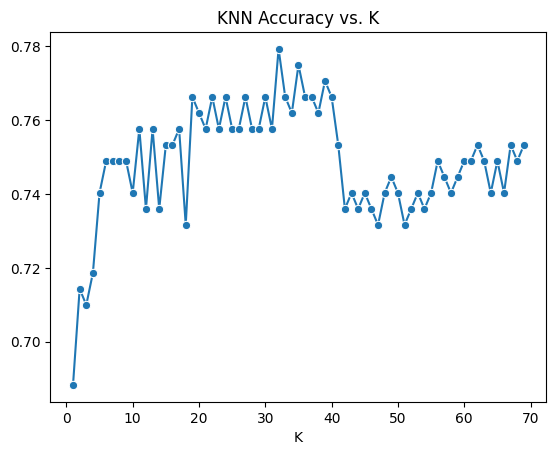

Best K: 32 with accuracy: 0.7792


In [30]:
acc_list = []
for k in range(1, 70):
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train_sc, y_train)
    y_pred = model_knn.predict(X_test_sc)
    acc = accuracy_score(y_test, y_pred)
    acc_list.append(acc)

sns.lineplot(x=range(1, 70), y=acc_list, marker="o")
plt.title('KNN Accuracy vs. K')
plt.xlabel('K')
plt.show()


max_acc = max(acc_list)
best_k = acc_list.index(max_acc) + 1

print(f"Best K: {best_k} with accuracy: {max_acc:.4f}")

So by above approach we get best k 21 for max accuracy 0.7662

In [31]:
from sklearn.ensemble import RandomForestClassifier

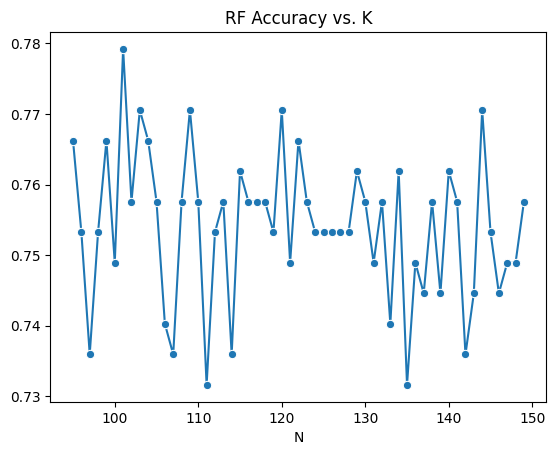

Best n: 7 with accuracy: 0.7792


In [32]:
acc_list_rf=[]

for i in range(95,150):

    model_rf = RandomForestClassifier(n_estimators=i)
    model_rf.fit(X_train_sc, y_train)
    y_pred_rf = model_rf.predict(X_test_sc)
    acc_rf = accuracy_score(y_test,y_pred_rf)
    acc_list_rf.append(acc_rf)

sns.lineplot(x=range(95, 150), y=acc_list_rf, marker="o")
plt.title('RF Accuracy vs. K')
plt.xlabel('N')
plt.show()


max_acc_rf = max(acc_list_rf)
best_n = acc_list_rf.index(max_acc_rf) + 1
print(f"Best n: {best_n} with accuracy: {max_acc_rf:.4f}")

 Feature Importance Analysis (Random Forest)
The bar plot above shows the relative importance of each feature in predicting the target variable (Outcome) using the Random Forest Classifier.

Key Observations:
- Glucose is by far the most important feature, with the highest importance score. This aligns with domain knowledge, as blood glucose levels are a critical indicator of diabetes.

- BMI (Body Mass Index) and Age follow as the next most important predictors, which also makes sense physiologically — obesity and older age are common risk factors.

- DiabetesPedigreeFunction is moderately important, indicating some relevance of genetic/hereditary factors in diabetes prediction.

- BloodPressure, Pregnancies, Insulin, and SkinThickness show lower importance scores, suggesting they are less influential in this model — though they may still contribute in non-linear interactions or with other models.

Conclusion:
- You can prioritize Glucose, BMI, and Age for simpler or explainable models (like Logistic Regression or Decision Trees).

- Less important features like Insulin and SkinThickness may be considered for removal if model complexity or dimensionality reduction is a concern.

- Feature importance is model-dependent, so results may vary across different algorithms. It's best to combine this analysis with permutation importance or SHAP values for deeper interpretability.

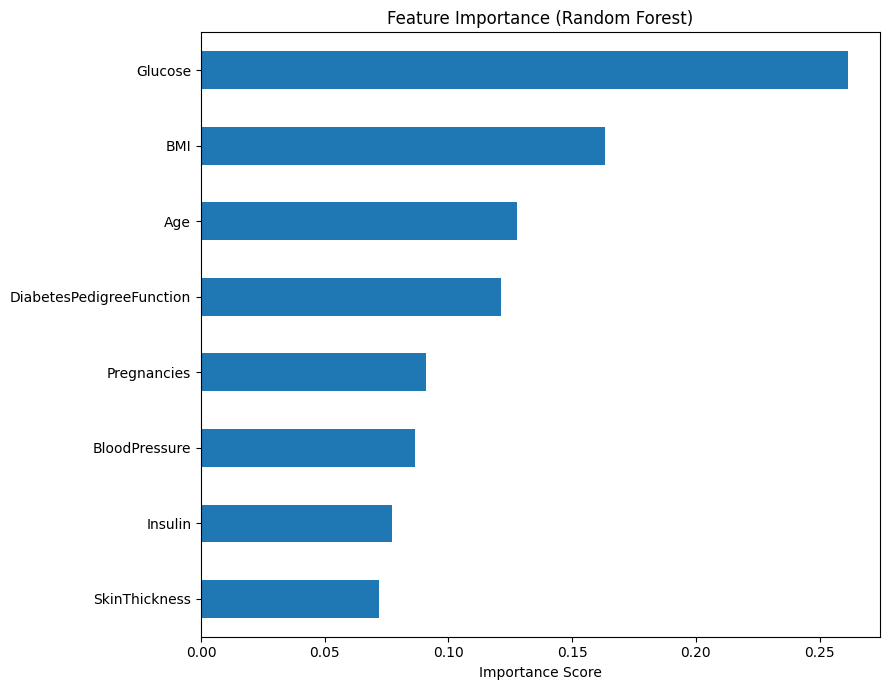

In [33]:
imp = model_rf.feature_importances_
pd.Series(imp, index=X_train.columns).sort_values().plot(kind='barh', figsize=(9, 7))
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

### SMOTE: Balancing the Dataset for Fair Learning

SMOTE (Synthetic Minority Over-sampling Technique) is used to handle class imbalance by generating synthetic samples of the minority class. In the diabetes dataset, the number of non-diabetic cases (Outcome = 0) is much higher than diabetic cases (Outcome = 1), which can bias machine learning models.

SMOTE solves this by creating artificial examples of the minority class. It selects a data point from the minority class, finds its k-nearest neighbors, and generates a new sample between the point and one of its neighbors. This way, it adds diversity and volume to the minority class without simply duplicating data.

We apply SMOTE only on the **training set** (after feature scaling), ensuring the model trains on a balanced dataset while still validating on real, unseen data. This leads to better performance, especially in metrics like **recall** and **F1-score**, which are crucial in medical predictions where false negatives must be minimized.



In [37]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train_sc, y_train.to_numpy())

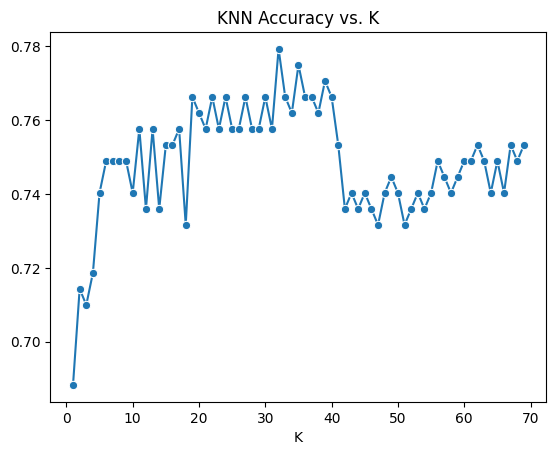

Best K: 32 with accuracy: 0.7792


In [38]:
acc_list = []
for k in range(1, 70):
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train_sc, y_train)
    y_pred = model_knn.predict(X_test_sc)
    acc = accuracy_score(y_test, y_pred)
    acc_list.append(acc)

sns.lineplot(x=range(1, 70), y=acc_list, marker="o")
plt.title('KNN Accuracy vs. K')
plt.xlabel('K')
plt.show()


max_acc = max(acc_list)
best_k = acc_list.index(max_acc) + 1

print(f"Best K: {best_k} with accuracy: {max_acc:.4f}")

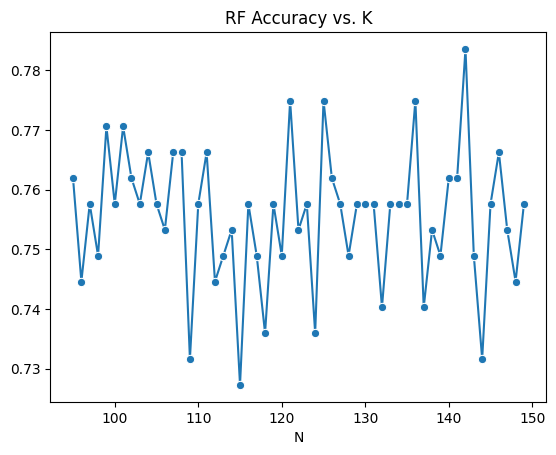

Best n: 48 with accuracy: 0.7835


In [39]:
acc_list_rf=[]

for i in range(95,150):

    model_rf = RandomForestClassifier(n_estimators=i)
    model_rf.fit(X_train_sc, y_train)
    y_pred_rf = model_rf.predict(X_test_sc)
    acc_rf = accuracy_score(y_test,y_pred_rf)
    acc_list_rf.append(acc_rf)

sns.lineplot(x=range(95, 150), y=acc_list_rf, marker="o")
plt.title('RF Accuracy vs. K')
plt.xlabel('N')
plt.show()


max_acc_rf = max(acc_list_rf)
best_n = acc_list_rf.index(max_acc_rf) + 1
print(f"Best n: {best_n} with accuracy: {max_acc_rf:.4f}")


##   Final Conclusion: Diabetes Prediction Project

This project aimed to predict diabetes using real-world patient health data by applying machine learning models — **K-Nearest Neighbors (KNN)** and **Random Forest**. Below is a summary of key outcomes and recommendations.

###   Random Forest Performance  
*(n_estimators = 213, min_samples_split = 5, class_weight = 'balanced')*

- **Accuracy:** 78.79%
- **Class 0 (Non-Diabetic):**  
  - Precision: **0.85**, Recall: **0.80**, F1-Score: **0.82**
- **Class 1 (Diabetic):**  
  - Precision: **0.66**, Recall: **0.73**, F1-Score: **0.69**

**  Observation:**  
Better balance between precision and recall, fewer false positives, and overall more robust than KNN.

---
###   Model Deployment

- Both models and the `StandardScaler` were saved using **Joblib**.
- Ready for integration into real healthcare systems.
- Ensures scalability and reusability.

---

###   Recommendation

The **Random Forest model** is recommended due to:
- Higher accuracy (78.79%)
- Balanced recall and precision
- Better overall reliability in medical use cases

For future work:
- Further **hyperparameter tuning**
- Explore **ensemble methods**
- Improve precision for diabetic cases without sacrificing recall

This ensures the model remains both clinically valuable and ethically responsible.